In [1]:
import numpy as np
import pandas as pd
from sklearn import (metrics, cross_validation, linear_model, preprocessing)
%matplotlib inline

# read the CSV file
path = r'D:\hotma\mchine_learning\cs'

path1 = path + r'\cs-training.csv'

scorecard=pd.read_csv(path1, na_values='NA')
# obtain the summarized statistics and get several 'pandas.core.series.Series' object 
scorecard.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [11]:

countvar=scorecard.count()
meanvar=np.round(scorecard.mean(),1)
minvar=scorecard.min()
maxvar=scorecard.max()
stdvar=np.round(scorecard.std(),1)
# merge above Series' objects into a data frame, so that it is easy to check and operate
statistics=pd.concat([meanvar, minvar, maxvar, stdvar, countvar], axis=1)  
# remove the index of the data frame
DF=pd.DataFrame(statistics).reset_index()
# return the name list of the data frame
orname=list(DF.columns.values)
# rename the data frame
DF.rename(columns={orname[0]: 'variable', orname[1]: 'mean', 
                   orname[2]: 'min', orname[3]: 'max',
                   orname[4]: 'std',orname[5]: 'non_missing'},                  
                   inplace = True)
DF.head()

,variable,mean,min,max,std,non_missing
0,ID,75000.5,1.0,150000.0,43301.4,150000
1,SeriousDlqin2yrs,0.1,0.0,1.0,0.2,150000
2,RevolvingUtilizationOfUnsecuredLines,6.0,0.0,50708.0,249.8,150000
3,age,52.3,0.0,109.0,14.8,150000
4,NumberOfTime30-59DaysPastDueNotWorse,0.4,0.0,98.0,4.2,150000


In [12]:
# get the total row number and append the column
DF['totcount']=scorecard['ID'].count()
#calculate missing percentage
DF['miss_per']=np.round(100*(DF['totcount']-DF['non_missing'])/DF['totcount'],1)

scorecard['MonthIncome_miss']=pd.isnull(scorecard['MonthlyIncome'])+0
scorecard['NumDependents_miss']=pd.isnull(scorecard['NumberOfDependents'])+0
scorecard[['ID', 'NumberOfDependents', 'MonthlyIncome', 'MonthIncome_miss', 'NumDependents_miss']].head(10)
scorecard_fix=scorecard.fillna(scorecard.mean())
#***bins for scorecard_fix['Utilization']******
scorecard_fix.head()


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthIncome_miss,NumDependents_miss
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0,0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,0


In [15]:
scorecard_fix['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [17]:
u=scorecard_fix['RevolvingUtilizationOfUnsecuredLines']
scorecard_fix['Utilization_bin1']=(u<=0)+0
scorecard_fix['Utilization_bin2']= ((u> 0) & (u <= 0.03))+0
scorecard_fix['Utilization_bin3']=((u>0.03) & (u <= 0.15))+0
scorecard_fix['Utilization_bin4']=((u>0.15) & (u <= 0.56))+0
scorecard_fix['Utilization_bin5']=((u>0.56) & (u <= 0.98))+0
#***bins for scorecard_fix['Numbe30_59PD']******

p30_59=scorecard_fix['NumberOfTime30-59DaysPastDueNotWorse']
p60_89=scorecard_fix['NumberOfTime60-89DaysPastDueNotWorse']
p90=scorecard_fix['NumberOfTimes90DaysLate']

scorecard_fix['Numbe30_59PD_bin1']=(p30_59<=0)
scorecard_fix['Numbe30_59PD_bin2']= ((p30_59 > 1) & (p30_59 <= 4))+0
#***bins for scorecard_fix['Num60_89PD']******
scorecard_fix['Num60_89PD_bin1']=(p60_89<=0)
scorecard_fix['Num60_89PD_bin2']= (p60_89 == 1)+0
scorecard_fix['Num60_89PD_bin3']= (p60_89 == 2)+0
#***bins for scorecard_fix['Number90PD']******
scorecard_fix['Number90PD_bin1']=(p90==0)
scorecard_fix['Number90PD_bin2']=(p90==1)

#***bins for scorecard_fix['Age']******
scorecard_fix['Age_bin1']=((scorecard_fix['age'] > 0) & (scorecard_fix['age'] <= 30))+0
scorecard_fix['Age_bin2']=((scorecard_fix['age'] > 30) & (scorecard_fix['age'] <= 40))+0
#***bins for scorecard_fix['Age']******
scorecard_fix['Age_bin3']=((scorecard_fix['age'] > 40) & (scorecard_fix['age'] <= 50))+0
scorecard_fix['Age_bin4']=((scorecard_fix['age'] > 50) & (scorecard_fix['age'] <= 60))+0
scorecard_fix['Age_bin5']=((scorecard_fix['age'] > 60) & (scorecard_fix['age'] <= 70))+0
#***bins for scorecard_fix['DebtRatio']******
scorecard_fix['DebtRatio_bin1']=(scorecard_fix['DebtRatio']==0)
scorecard_fix['DebtRatio_bin2']=((scorecard_fix['DebtRatio'] > 0) & (scorecard_fix['DebtRatio'] <= 0.15))+0
scorecard_fix['DebtRatio_bin3']=((scorecard_fix['DebtRatio'] > 0.15) & (scorecard_fix['DebtRatio'] <= 0.3))+0
scorecard_fix['DebtRatio_bin4']=((scorecard_fix['DebtRatio'] > 0.3) & (scorecard_fix['DebtRatio'] <= 0.5))+0
scorecard_fix['DebtRatio_bin5']=((scorecard_fix['DebtRatio'] > 0.5) & (scorecard_fix['DebtRatio'] <= 0.8))+0
scorecard_fix['DebtRatio_bin6']=((scorecard_fix['DebtRatio'] > 0.8) & (scorecard_fix['DebtRatio'] <= 1))+0
scorecard_fix['DebtRatio_bin7']=((scorecard_fix['DebtRatio'] > 1) & (scorecard_fix['DebtRatio'] <= 1000))+0
scorecard_fix['DebtRatio_bin8']=((scorecard_fix['DebtRatio'] > 1000) & (scorecard_fix['DebtRatio'] <= 2000))+0
#***bins for scorecard_fix.NumCreditLine******/
NumCreditLine=scorecard_fix['NumberOfOpenCreditLinesAndLoans']
scorecard_fix['NumCreditLine_bin1']=(NumCreditLine<=4)+0
scorecard_fix['NumCreditLine_bin2']=((NumCreditLine>4) & (NumCreditLine<=7))+0
scorecard_fix['NumCreditLine_bin3']=((NumCreditLine>7) & (NumCreditLine<=10))+0
scorecard_fix['NumCreditLine_bin4']=((NumCreditLine>10) & (NumCreditLine<=16))+0
# we compute correlation between 'Bad' and independent variables

scorecard_fix.rename(columns={'SeriousDlqin2yrs' : 'Bad'}, inplace = True) 
Y=scorecard_fix['Bad'] 

print Y[1:5]
scorecard_fix.head()


1    0
2    0
3    0
4    0
Name: Bad, dtype: int64


,ID,Bad,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,...,DebtRatio_bin3,DebtRatio_bin4,DebtRatio_bin5,DebtRatio_bin6,DebtRatio_bin7,DebtRatio_bin8,NumCreditLine_bin1,NumCreditLine_bin2,NumCreditLine_bin3,NumCreditLine_bin4
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,...,0,0,0,1,0,0,0,0,0,1
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
varnamelist=list(scorecard_fix.columns.values)
corr=list()   # define an empty list
# loop for all independent variables
for vname in varnamelist: 
        X=scorecard_fix[vname]    # loop all the variables in the data frame
        C=np.corrcoef(X, Y)             # calculate correlation matrix
        beta=np.round(C[1, 0],3)
        corr=corr+[beta]      # gather all correlation coefficients in a list
# change column names
corrdf=pd.DataFrame({'varname': varnamelist, 'correlation': corr})
filtercond=corrdf['correlation'] < 1
corrdf=corrdf[filtercond]
corrdf['abscorr']=np.abs(corrdf['correlation'])
# sort absolute value of correlation in descending order
corrdf.sort(['abscorr'], ascending=False, inplace=True)
seq=range(1,len(corrdf)+1)
corrdf['order']=seq  # add a sequential number column
selectedvar0=corrdf[corrdf.abscorr>0.02]['varname'] # Series containing the names of qualified features 
selectedscorecard=scorecard_fix[['Bad']+list(selectedvar0)]+0 # slicing the data frame and get a sub data set 
selectedscorecard.head(10)

print selectedscorecard.shape                

npscorecardx=selectedscorecard[list(selectedvar0)].values          # independent variables
npscorecardy=np.array(list(selectedscorecard.Bad))         
print npscorecardx[0:5]


(150000, 30)
[[  1.   1.   0.   1.   0.   0.   0.   1.   2.   0.  45.   0.   0.   0.
    0.   0.   0.   0.   2.   0.   0.   0.   1.  13.   1.   0.   0.   0.
    0.]
 [  1.   1.   1.   0.   0.   0.   0.   1.   0.   0.  40.   0.   0.   0.
    0.   1.   1.   0.   1.   0.   0.   0.   0.   4.   0.   0.   0.   0.
    0.]
 [  0.   1.   0.   0.   1.   0.   0.   1.   1.   1.  38.   0.   0.   0.
    0.   1.   1.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.
    0.]
 [  1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  30.   0.   0.   0.
    0.   0.   0.   1.   0.   0.   0.   1.   0.   5.   0.   0.   0.   0.
    1.]
 [  1.   1.   0.   0.   0.   0.   0.   1.   1.   0.  49.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   1.   7.   0.   0.   0.   0.
    1.]]


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [19]:
list(scorecard_fix.columns)

['ID',
 'Bad',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'MonthIncome_miss',
 'NumDependents_miss',
 'Utilization_bin1',
 'Utilization_bin2',
 'Utilization_bin3',
 'Utilization_bin4',
 'Utilization_bin5',
 'Numbe30_59PD_bin1',
 'Numbe30_59PD_bin2',
 'Num60_89PD_bin1',
 'Num60_89PD_bin2',
 'Num60_89PD_bin3',
 'Number90PD_bin1',
 'Number90PD_bin2',
 'Age_bin1',
 'Age_bin2',
 'Age_bin3',
 'Age_bin4',
 'Age_bin5',
 'DebtRatio_bin1',
 'DebtRatio_bin2',
 'DebtRatio_bin3',
 'DebtRatio_bin4',
 'DebtRatio_bin5',
 'DebtRatio_bin6',
 'DebtRatio_bin7',
 'DebtRatio_bin8',
 'NumCreditLine_bin1',
 'NumCreditLine_bin2',
 'NumCreditLine_bin3',
 'NumCreditLine_bin4']

C statistics regression cross cv 0.854468


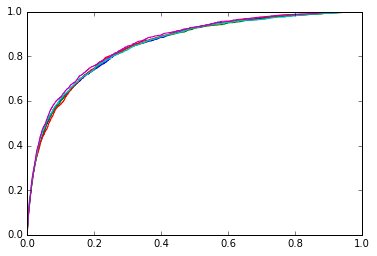

In [8]:
# now we use cross validation based on logistic regression

# Run classifier with cross-validation and plot ROC curves
# third method -- use KFOLD


from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold(npscorecardy, n_folds=5)
logisfits = linear_model.LogisticRegression(C=1e5, penalty='l1')

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = logisfits.fit(npscorecardx[train], npscorecardy[train]).predict_proba(npscorecardx[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(npscorecardy[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
print "C statistics regression cross cv %f" % (mean_auc)



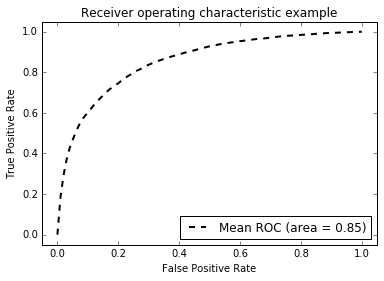

In [9]:
plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [20]:
def modeling(SEED):
    SUM_C = 0.0
    folders = 5      
    X = npscorecardx
    y= npscorecardy    
    dec=pd.DataFrame([])
    for k in range(folders):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.2, random_state=2*k+SEED)
        fits = linear_model.LogisticRegression(C=1e5, penalty='l1')
        fits.fit(X_train, y_train) 
        predict_p = fits.predict_proba(X_test)[:, 1]
        dec['score']=predict_p   # merge X data and y into one data frame
        dec['target']= y_test
        if (k == 0): 
            scoredata=dec.copy()
        else:    
            scoredata=pd.concat([scoredata, dec])  # stack all validation data with scores, it has duplicates, as we use 5 folds            
    return(scoredata) 

scoredata=modeling(31) 
scoredata.shape   # (180000, 30),   we need to select some random samples from it

(150000, 2)

In [11]:
# generate a column containing random numbers    
scoredata['random']=np.random.random_sample(size=len(scoredata)) 

# Randomly selecting data frame with 30% population
validation=scoredata[scoredata.random>0.7]

def grouping(data, grpnum):
    grp=pd.qcut(data['score'], grpnum, labels=False)
    data['ranks']=grp
    return data

validation=grouping(validation, 10)
validation[['target', 'score', 'ranks']].head(n=10)
G=validation.groupby('ranks')
M=G[['target', 'score']].mean()
M=M.sort_values(by='score', ascending=False) # put the worst at the top
M

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,target,score
ranks,,
9,0.351658,0.353094
8,0.113732,0.104137
7,0.065880,0.066943
6,0.047407,0.043983
5,0.030721,0.031760
4,0.021812,0.023822
3,0.012909,0.018297
2,0.008903,0.014524
1,0.007345,0.011213


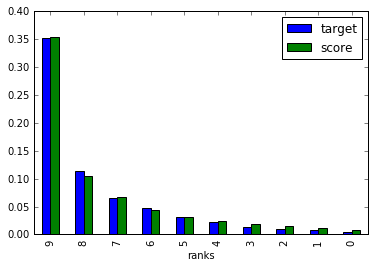

In [12]:
M.plot(kind='bar');

In [23]:
X = npscorecardx
y= npscorecardy    
    
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.2, random_state=2)
fits = linear_model.LogisticRegression(C=1e5, penalty='l1')
fits.fit(X_train, y_train) 

print(np.count_nonzero(fits.coef_))  # 20 non-zero coefficients

# check lr_cv.coef_ 
print(fits.coef_)

29
[[-1.60304906 -2.13222633 -0.64592951  0.24850894 -0.37735271 -0.9349298
  -0.4334258  -0.3823172   0.14710897  0.09344588 -0.01583984 -1.76865206
  -0.26073224 -2.04160506 -0.18480539  0.00842891 -0.12766963  0.03396189
   0.02699086 -1.50833376  0.15742834 -1.16305566  0.04857242  0.02370503
   0.37433316 -0.15303079  0.01163973 -0.16743712 -0.18891252]]


In [26]:
import numpy as np
import pandas as pd

fits = linear_model.LogisticRegression(C=1e5, penalty='l1')
fits.fit(X_train, y_train) 

predict_p = fits.predict_proba(X_train)[:, 1]
sse = np.sum((predict_p - y_train) ** 2, axis=0) / float(X_train.shape[0] - X_train.shape[1])
sse        

0.049881421461860406

In [39]:
from sklearn import linear_model
from scipy import stats

numofvar=X_train.shape[1]
se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X_train.T, X_train))))])

se

array([[  9.98595563e-03,   1.21777280e-02,   3.04749783e-03,
          4.21392835e-03,   8.14607860e-03,   1.00625755e-02,
          1.05515334e-02,   2.79693422e-03,   1.90403746e-03,
          2.92326251e-03,   8.67083178e-05,   2.70560488e-03,
          3.42664970e-03,   2.86069386e-03,   1.87371389e-03,
          2.98045119e-03,   3.65105082e-03,   4.11879769e-03,
          6.33407657e-04,   3.28778343e-03,   2.17917518e-03,
          2.67077934e-03,   2.24385056e-03,   2.62332086e-04,
          4.10101159e-03,   2.36868662e-03,   1.76195119e-03,
          1.73730648e-03,   2.86605052e-03]])

In [43]:
t_statistics = fits.coef_ / se
print 't statistics', t_statistics 

df= y_train.shape[0] - X_train.shape[1]
print 'degree of freedom', df

p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistics), df))
print 'p value for each key driver', p_value

t statistics [[-159.9476004  -175.95301719 -211.73101836   58.80676828  -45.87502729
   -93.6966715   -41.58230343 -136.70815661   77.56255102   32.6552131
  -183.00980664 -653.693477    -76.85782693 -713.64622866  -98.58707323
     2.59129166  -35.03015439    7.99941361   42.56223076 -458.76376405
    72.26068388 -435.47327024   21.46025794   90.25736951   91.2746431
   -64.65374454    6.57685566  -96.36891282  -65.98356237]]
degree of freedom 119971
p value for each key driver [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   9.56279936e-03
    0.00000000e+00   1.11022302e-15   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   4.82462958e-11   0.00000000e+00
    0.00000000e+00]]


In [47]:
# we now calculate KS
# KS=max(abs(Sensitivity+specificity-1))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.3, random_state=12)
prob = logisfits.fit(X_train, y_train).predict_proba(X_test)
print prob

fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
kss=np.abs(tpr-fpr)
ks=kss.max()
print "KS of the model is %f" % (ks)


[[ 0.51438654  0.48561346]
 [ 0.92441814  0.07558186]
 [ 0.95741286  0.04258714]
 ..., 
 [ 0.95972702  0.04027298]
 [ 0.96750958  0.03249042]
 [ 0.96111037  0.03888963]]
KS of the model is 0.555975


In [49]:
# conmatrix based on prediction of classification 

from sklearn.metrics import confusion_matrix
predict_class = logisfits.fit(X_train, y_train).predict(X_test)
conmatrix = confusion_matrix(y_test, predict_class)
print conmatrix

#accuracy rate
print logisfits.score(X_test, y_test)


[[41578   454]
 [ 2416   552]]
0.936222222222
